<h2><font color='#655588'><b>An Analysis of the Iris Data Set</b></font></h2>
<h6><b>Author: Mark Gallagher</b></h6>
<h6><b>Module: Programming and Scripting (ATU)</b></h6>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBmlP5kPVYSNI04lQYiYbFI_Kxd1BXuwcQbIl4O4BgvQ&s" width="200">

<sub><b>[Figure 1. Iris Flower Botanical Painting by Kseniia Tikhomirova](https://www.artmajeur.com/ksyusha-sokolova/en/artworks/14044745/iris-flower-botanical-painting)</b></sub>

---

#### <font color='#866c46'><b>Table of contents</b></font><a class='anchor' id='top'></a>

- [Section 1: Introduction](#section-1-load-libraries)
- [Section 2: Import Libraries](#section-2-import-data)
- [Section 3: Load the Data](#section-2-load-the-data)
- [Section 4: Inspect the Data](#secition-3-inspect-data)
- Section 5: Data Variables (An Overview)
- Section 6: Conclusion
<br><br>
***

#### <font color='#866c46'><b>Section 1. Introduction</b></font>

The Fisher Iris data set was introduced by biologist [Sir Ronald Aylmer Fisher](https://www.britannica.com/biography/Ronald-Aylmer-Fisher) in 1936 as an example of discriminant analysis. It contains 50 samples from each of three species of Iris flowers (Iris Setosa, Iris Virginica and Iris Versicolor).
<br><br>
Four features were measured (from each of the samples); the length and width of sepal and petal (in cm). Based on the combination of the four features, Fisher developed a linear discriminant model to distinguish the species from one another.
<br><br>
<sub><b>source: [Tutorial: Analysis of the Fisher Iris Dataset](https://www.idiap.ch/software/beat/docs/bob/docs/v7.0.0/example.html)</b></sub>

***

#### <font color='#866c46'><b>Section 2. Import Libraries</b></font>

In [273]:
# Load the required libraries for my analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

#### <font color='#866c46'><b>Section 3: Load the Data</b></font>

In [274]:
# Read the CSV file from a URL 
iris = pd.read_csv('data.csv') # CSV file created and data loaded directly

# Presenting the first 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<sub><b>[Source: Iris Dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv)</b></sub>

***

#### <font color='#866c46'><b>Secition 4: Inspect Data</b></font>

In [297]:
# 4.1 - Getting information about the dataset. 
iris.shape

(150, 5)

<sub><b>Summary:</b> This illustrates that the data frame array contains 150 rows and 5 columns.</sub>

In [296]:
# 4.2 - Inspect the data type of each columns
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [304]:
# 4.2.1 - An alternative way to check all information associated to this dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<sub><b>Summary:</b> There are 5 variables included in the 'Iris' data set. They are:
1. Sepal Length (Float)
2. Sepal Width (Float)
3. Petal Length (Float)
4. Petal Width (Float)
5. Variety (Object)

There are no 'null' values associated with this data set.

Four columns are 'numerical' type

One column is a 'categorical' type

<sub><b>source: https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda</b></sub>

In [300]:
# 4.3 - Describing the entire dataset
iris.describe() # This will give us a statistical overview of the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<sub><b>Summary:</b> The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. The describe() function gives a good picture of the distribution of the data set.</sub>

In [301]:
# 4.3.1 - Describing the 'Setosa' sub-set of data
iris_setosa = iris.loc[iris["species"]=="setosa"]
iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [302]:
# 4.4 - Counting the total number of each species in the dataset
iris.species.value_counts()

# We can also use: iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<sub><b>Summary:</b> All the three classes have equal data points (e.g. 50) which tells us that it is a balanced dataset.</sub>

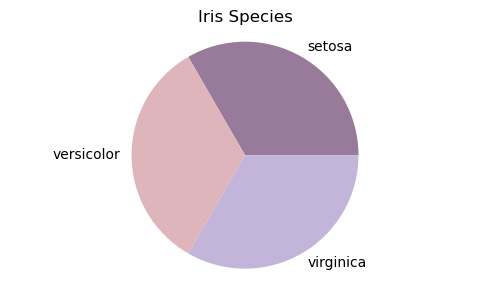

In [305]:
# 4.4.1 - Data visualisation of 'Species'

# Step 1: Define the segment colors
colors = ['#987b9b', '#ddb5bb', '#c2b5d9',]

# Step 2: Create the pie chart
plt.figure(figsize=(5, 3)) # Set the size of the plot
plt.pie(species_counts, labels=species_counts.index, colors=colors)

# Step 3: Styling the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Iris Species') # Set the title of the plot
plt.tight_layout()

# Step 4: Show the chart
plt.show() # Display the plot

In [307]:
# Describe the data set and print the output to 'variable_summary.csv'
iris.describe().to_csv('data_summary.csv')

***

#### <font color='#866c46'><b>Section 5: Data Visualisation (Histogram)</b></font>

<sub>Creating a histogram for the Iris dataset is a vital step in the exploratory data analysis process in Python. A histogram provides a visual representation of the distribution of a dataset's numerical variables (i.e. sepal length, sepal width, petal length, and petal width). This visualization helps us to understand the frequency distribution of these measurements across the Iris dataset.</sub>

<sub>Python offers efficient tools for this purpose (i.e. Matplotlib) that allow for the easy generation of histograms, offering insights into the shape, spread, and central tendency of the data.</sub>

##### <font color='#987b9b'><b>5.1: Sepal Length</b></font>

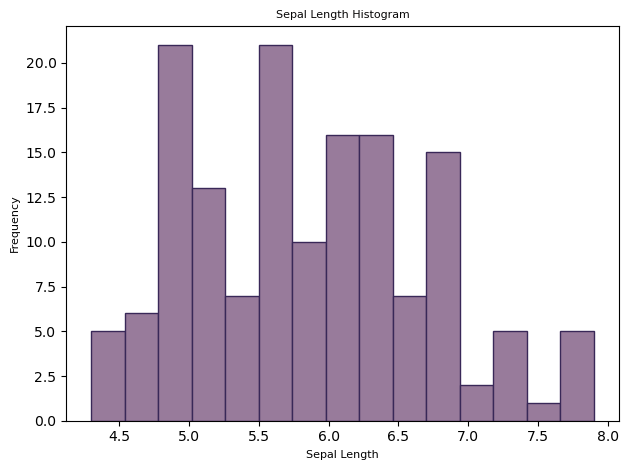

In [308]:
# Step 1: Create the Histogram
plt.hist(iris['sepal_length'], bins=15, color='#987b9b', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Sepal Length Histogram", size=8, color="#060505") # Set the title with specified font size and color
plt.xlabel('Sepal Length', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("sepal_length_histogram.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

<sub><b>Interpretation:</b>
<br><br>
<sub><b>Shape:</b> The histogram appears to be approximately bell-shaped, suggesting that the sepal lengths might follow a normal distribution.</sub>
<br>
<sub><b>Central Tendency</b>: The peak of the histogram, or the highest bar, indicates the most common sepal length. In this case, it seems to be around 5.5 to 6.0 cm.</sub>

<sub><b>source: [Creating Histograms using Pandas](https://mode.com/example-gallery/python_histogram)</b></sub>
<br>
<sub><b>source: [Matplotlib.pyplot.savefig() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-savefig-in-python/)</b></sub>
<br>
<sub><b>source: [How to Interpret Histograms](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1#:~:text=A%20histogram%20shows%20how%20frequently,to%20be%20discrete%20positive%20integers.)</b></sub>


##### <font color='#987b9b'><b>5.2: Sepal Width</b></font>

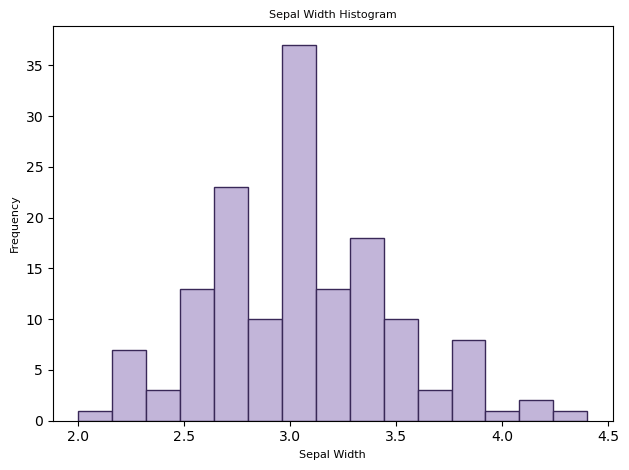

In [309]:
# Step 1: Create the Histogram
plt.hist(iris['sepal_width'], bins=15, color='#c2b5d9', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Sepal Width Histogram", size=8, color="#060505") # Set the title with specified font size and color
plt.xlabel('Sepal Width', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("sepal_width_histogram.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

<sub><b>Interpretation:</b>
<br><br>
<sub><b>Shape</b>: Similar to the previous histogram, this histogram also appears to be approximately bell-shaped, suggesting a possible normal distribution of sepal lengths.</sub>
<br>
<sub><b>Central Tendency</b>: The peak of the histogram indicates the most common sepal length. In this case, it's around 5.5 to 6.0 cm, consistent with our previous interpretation.</sub>

##### <font color='#987b9b'><b>5.3: Petal Length</b></font>

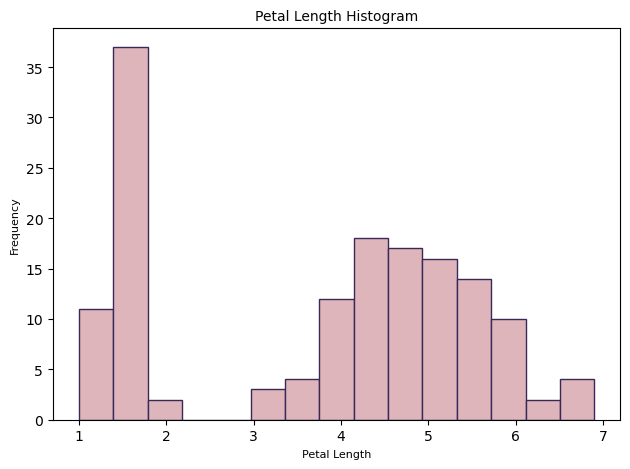

In [284]:
# Step 1: Create the Histogram
plt.hist(iris['petal_length'], bins=15, color='#ddb5bb', edgecolor='#392858')

# Step 2: Style the Histogram
plt.title("Petal Length Histogram", size=10, color="#060505") # Set the title with specified font size and color
plt.xlabel('Petal Length', size=8) # x-axis label with specified font size
plt.ylabel('Frequency', size=8) # y-axis label with specified font size
plt.tight_layout()

# Step 3: Save the figure
# plt.savefig("petal_length_histogram.png") # Save the histogram as a png file

# Step 4: Show the file
plt.show() # Display the histogram plot

<sub><b>Interpretation:</b>
<br><br>
<sub><b>Shape</b>: The histogram of petal lengths appears to be bimodal, meaning it has two peaks. This suggests that there might be two distinct groups or species of iris in the dataset based on their petal lengths.</sub>
<br>
<sub><b>Central Tendency</b>: There are two peaks in the histogram, indicating two common petal lengths. One peak is around 1.5 to 2.0 cm, and the other is around 4.5 to 5.0 cm.</sub>

##### <font color='#987b9b'><b>5.4: Petal Width</b></font>

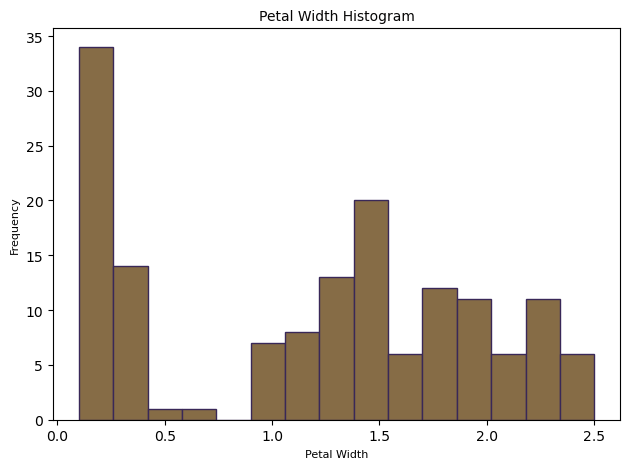

In [285]:
# Step 2: Create the Histogram
plt.hist(iris['petal_width'], bins=15, color='#866c46', edgecolor='#392858')

# Step 3: Style the Histogram
plt.title("Petal Width Histogram", size=10, color="#060505")
plt.xlabel('Petal Width', size=8)
plt.ylabel('Frequency', size=8)
plt.tight_layout()

# Step 4: Save the figure
# plt.savefig("petal_width_histogram.png")

# Step 5: Show the file
plt.show()

<sub><b>Interpretation:</b>
<br><br>
<sub><b>Shape</b>: The histogram of petal widths appears to be unimodal, indicating one dominant peak.</sub>
<br>
<sub><b>Central Tendency</b>: The peak of the histogram indicates the most common petal width. In this case, it's around 0.2 to 0.3 cm.</sub>

##### <font color='#987b9b'><b>5.5: Combined Histogram</b></font>

<sub><b>5.1: Option 1</b></sub>

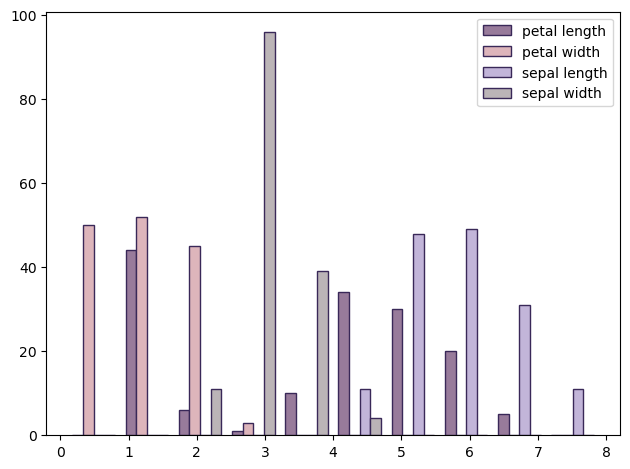

In [295]:
# Step 1: Define the bar colors
colors = ['#987b9b', '#ddb5bb', '#c2b5d9', '#bbb4b7']

# Step 2: Style the Histogram
plt.hist([iris['petal_length'], iris['petal_width'], iris['sepal_length'], iris['sepal_width']], label=['petal length', 'petal width', 'sepal length', 'sepal width'], color=colors, edgecolor='#392858')
plt.legend()
plt.tight_layout()

# Step 3: 

<sub><b>5.2: Option 2</b></sub>

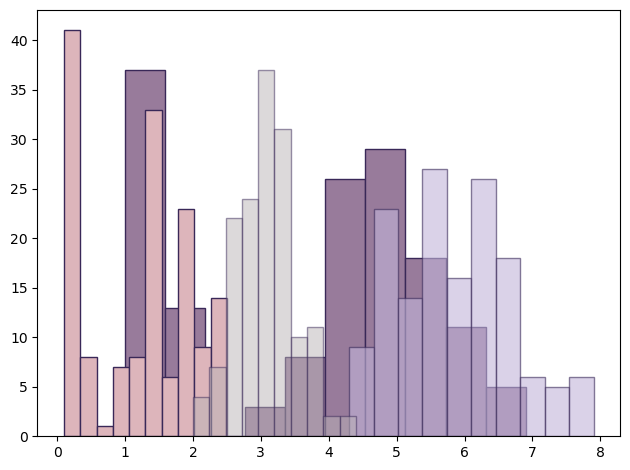

In [287]:
# Step 1: Plot and Style the Histogram
plt.hist(iris['petal_length'], color='#987b9b', edgecolor='#392858') # Add color
plt.hist(iris['petal_width'], color='#ddb5bb', edgecolor='#392858', alpha=1) # Add color and transparency level
plt.hist(iris['sepal_length'], color='#c2b5d9',edgecolor='#392858', alpha=0.6) # Add color and transparency level
plt.hist(iris['sepal_width'], color='#bbb4b7', edgecolor='#392858', alpha=0.5) # Add color and transparency level
plt.tight_layout()

# Step 2: Save the PNG

***

#### <font color='#866c46'><b>Section 6: Data Visualisation (Two Variable Plot)</b></font>

> A scatter plot is a visual representation of how two variables relate to each other. We will now use several scatter plots to explore the relationship between both sets of variables in the Iris dataset.

<sub><b>source: [Visualizing Data in Python Using plt.scatter()](https://realpython.com/visualizing-python-plt-scatter/)</b></sub>

##### <b>Section 6.1: Petal Length vs. Petal Width</b>

In [288]:
# Get just the petal length
plen = iris['petal_length'] # Create a new variable for petal length

# Show the data
print(plen) # Display (print) the data

# Show the Type
print(type(plen)) # Display the data type

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64
<class 'pandas.core.series.Series'>


In [289]:
# Just get the numpy array.
plen = plen.to_numpy()

# Show
plen

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [290]:
# Get just the petal width
pwidth = iris['petal_width'].to_numpy()

# Show
pwidth

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

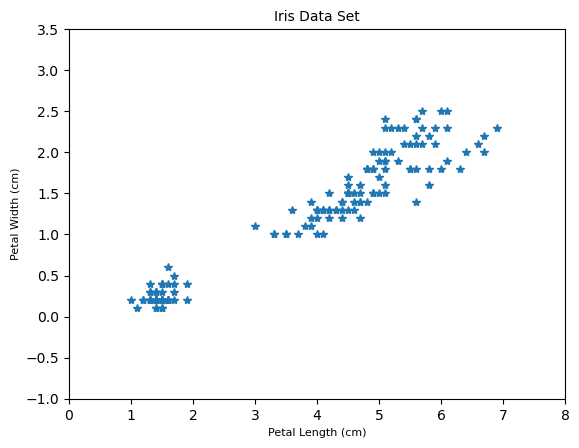

In [291]:
# Step 1: Create Simple Plot
plt.plot(plen, pwidth, '*')

# Step 2: Style the Scatter Plot
plt.xlabel('Petal Length (cm)', size=8)
plt.ylabel('Petal Width (cm)', size=8)

# Step 3: Add a Title
plt.title('Iris Data Set', size=10)

# Step 4: Set X and Y Limits
plt.xlim(0.0, 8.0)
plt.ylim(-1.0, 3.5)

# Step 5: Save the figure
plt.savefig("plen-v-pwdith-scatter.png")

# Step 6: Show the file
plt.show()

### Section 4.1: Add a Best Fit Line

###### source: [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

$ y = mx + c = p_1 x^1 + p_0 = p1 x + p_0$

In [293]:
# Fit a straight line betwee x and y
b, a = np.polyfit(plen, pwidth, 1)

# Show m and c.
b, a

(0.41575541635241153, -0.36307552131902887)

(-1.0, 4.0)

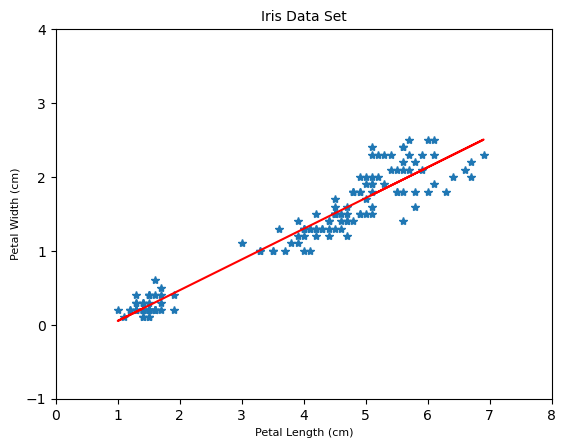

In [ ]:
# Create a new figure and set of axis
fig, ax = plt.subplots()

# Simple Plot
ax.plot(plen, pwidth, '*')

# Simple Plot
ax.plot(plen, m * plen + c, 'r-')

# Add Axis labels
ax.set_xlabel('Petal Length (cm)', size=8)
ax.set_ylabel('Petal Width (cm)', size=8)

# Title
ax.set_title('Iris Data Set', size=10)

# Set X Limits
ax.set_xlim(0.0, 8.0)

# Set Y Limits
ax.set_ylim(-1.0, 4.0)

In [ ]:
# Measure the correlation
np.corrcoef(plen, pwidth) # Create a correlation matrix

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

<sub><b>Value of correlation</b>: 0.96286543</sub>
<br><br>
<sub><b>Analysis</b>: The correlation matrix indicates that the two variables being analyzed have a very strong positive correlation, almost close to perfect correlation, as indicated by the correlation coefficient of approximately 0.9629.</sub>
<br><br>
<sub><b>source: [Create a correlation Matrix using Python](#)</b></sub>

In [ ]:
# X values for best fit line.
bf_x = np.linspace(0.0, 8.0, 100)

# Y values for best fit line.
bf_y = m * bf_x + c

(-1.0, 4.0)

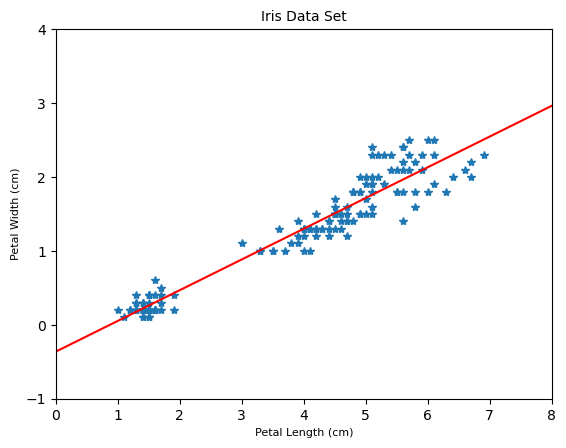

In [ ]:
# Create a new figure and set of axis
fig, ax = plt.subplots()

# Simple Plot
ax.plot(plen, pwidth, '*')

# Simple Plot
ax.plot(bf_x, bf_y, 'r-')

# Add Axis labels
ax.set_xlabel('Petal Length (cm)', size=8)
ax.set_ylabel('Petal Width (cm)', size=8)

# Title
ax.set_title('Iris Data Set', size=10)

# Set X Limits
ax.set_xlim(0.0, 8.0)

# Set Y Limits
ax.set_ylim(-1.0, 4.0)

***

##### End

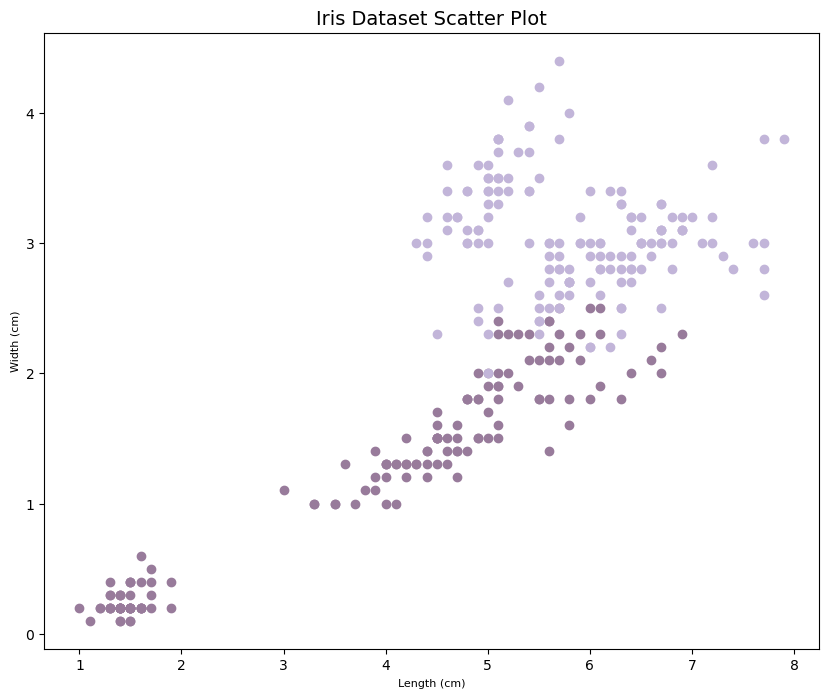

In [ ]:
plt.figure(figsize=(10, 8)) # Set the figure size
plt.scatter(iris['petal_length'], iris['petal_width'], c='#987b9b', label='Petal') # Create scatter plot for Petals
plt.scatter(iris['sepal_length'], iris['sepal_width'], c='#c2b5d9', label='Sepal') # Create scatter plot for Sepals
plt.xlabel('Length (cm)', size=8) # Adding the label for the x-axis
plt.ylabel('Width (cm)', size=8) # Adding the label for the y-axis
plt.title('Iris Dataset Scatter Plot', size=14) # Create and size the plot title
plt.show() # Display the plot